In [ ]:
from io import StringIO
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import markers
import seaborn as sns
import plotly.express as px

Link para acesso

https://rtrsports.com/en/blog/motogp-list-constructors-champions/

In [ ]:
winners_data = """
Season	Constructor	Class
2022	Ducati	MotoGP™
2022	Kalex	Moto2™
2022	GasGas	Moto3™
2022	Energica	MotoE™
2021	Yamaha	MotoGP™
2021	Kalex	Moto2™
2021	KTM	Moto3™
2021	Energica	MotoE™
2020	Suzuki	MotoGP™
2020	Kalex	Moto2™
2020	KTM	Moto3™
2020	Energica	MotoE™
2019	Honda	MotoGP™
2019	Kalex	Moto2™
2019	Honda	Moto3™
2019	Energica	MotoE™
2018	Honda	MotoGP™
2018	Kalex	Moto2™
2018	Honda	Moto3™
2017	Honda	MotoGP™
2017	Kalex	Moto2™
2017	Honda	Moto3™
2016	Honda	MotoGP™
2016	Kalex	Moto2™
2016	KTM	Moto3™
2015	Yamaha	MotoGP™
2015	Kalex	Moto2™
2015	Honda	Moto3™
2014	Honda	MotoGP™
2014	Kalex	Moto2™
2014	Honda	Moto3™
2013	Honda	MotoGP™
2013	Kalex	Moto2™
2013	KTM	Moto3™
2012	Yamaha	MotoGP™
2012	Suter	Moto2™
2012	KTM	Moto3™
2011	Honda	MotoGP™
2011	Kalex	Moto2™
2011	Aprilia	125cc
2010	Yamaha	MotoGP™
2010	Moriwaki	Moto2™
2010	Derbi	125cc
2009	Yamaha	MotoGP™
2009	Honda	250cc
2009	Aprilia	125cc
2008	Yamaha	MotoGP™
2008	Gilera	250cc
2008	Derbi	125cc
2007	Ducati	MotoGP™
2007	Aprilia	250cc
2007	Aprilia	125cc
2006	Honda	MotoGP™
2006	Aprilia	250cc
2006	Aprilia	125cc
2005	Yamaha	MotoGP™
2005	Honda	250cc
2005	Honda	125cc
2004	Yamaha	MotoGP™
2004	Honda	250cc
2004	Honda	125cc
2003	Honda	MotoGP™
2003	Aprilia	250cc
2003	Honda	125cc
2002	Honda	MotoGP™
2002	Aprilia	250cc
2002	Aprilia	125cc
2001	Honda	MotoGP™
2001	Honda	250cc
2001	Gilera	125cc
2000	Suzuki	MotoGP™
2000	Yamaha	250cc
2000	Aprilia	125cc
1999	Honda	500cc
1999	Aprilia	250cc
1999	Honda	125cc
1998	Honda	500cc
1998	Aprilia	250cc
1998	Honda	125cc
1997	Honda	500cc
1997	Honda	250cc
1997	Aprilia	125cc
1996	Honda	500cc
1996	Aprilia	250cc
1996	Honda	125cc
1995	Honda	500cc
1995	Aprilia	250cc
1995	Honda	125cc
1994	Honda	500cc
1994	Aprilia	250cc
1994	Aprilia	125cc
1993	Suzuki	500cc
1993	Yamaha	250cc
1993	Honda	125cc
1992	Yamaha	500cc
1992	Honda	250cc
1992	Aprilia	125cc
1991	Yamaha	500cc
1991	Honda	250cc
1991	Honda	125cc
1990	Yamaha	500cc
1990	Yamaha	250cc
1990	Honda	125cc
1989	Honda	500cc
1989	Honda	250cc
1989	JJ Cobas	125cc
1989	Derbi	80cc
1988	Yamaha	500cc
1988	Honda	250cc
1988	Derbi	125cc
1988	Derbi	80cc
1987	Honda	500cc
1987	Honda	250cc
1987	Garelli	125cc
1987	Derbi	80cc
1986	Yamaha	500cc
1986	Yamaha	250cc
1986	Garelli	125cc
1986	Derbi	80cc
1985	Honda	500cc
1985	Honda	250cc
1985	Garelli	125cc
1985	Krauser	80cc
1984	Yamaha	500cc
1984	Chevallier	250cc
1984	Garelli	125cc
1984	Zundapp	80cc
1983	Honda	500cc
1983	Yamaha	250cc
1983	Garelli	125cc
1983	Krauser	50cc
1982	Suzuki	500cc
1982	Yamaha	250cc
1982	Garelli	125cc
1982	Kawasaki	350cc
1982	Kreidler	50cc
1981	Suzuki	500cc
1981	Kawasaki	250cc
1981	Minarelli	125cc
1981	Kawasaki	350cc
1981	Motul Bultaco	50cc
1980	Yamaha	500cc
1980	Kawasaki	250cc
1980	MBA	125cc
1980	Bimota-Yamaha	350cc
1980	Kreidler Van Veen	50cc
1979	Yamaha	500cc
1979	Kawasaki	250cc
1979	Minarelli	125cc
1979	Kawasaki	350cc
1979	Kreidler	50cc
1978	Yamaha	500cc
1978	Kawasaki	250cc
1978	MBA	125cc
1978	Kawasaki	350cc
1978	Bultaco	50cc
1977	Suzuki	500cc
1977	Morbidelli	250cc
1977	Morbidelli	125cc
1977	Yamaha	350cc
1977	Bultaco	50cc
1976	Suzuki	500cc
1976	Harley Davidson	250cc
1976	Morbidelli	125cc
1976	Harley Davidson	350cc
1976	Bultaco	50cc
1975	Yamaha	500cc
1975	Harley Davidson	250cc
1975	Morbidelli	125cc
1975	Yamaha	350cc
1975	Kreidler	50cc
1974	MV Agusta	500cc
1974	Harley Davidson	250cc
1974	Yamaha	125cc
1974	Yamaha	350cc
1974	Van Veen-Kreidler	50cc
1973	MV Agusta	500cc
1973	Yamaha	250cc
1973	Yamaha	125cc
1973	MV Agusta	350cc
1973	Kreidler	50cc
1972	Honda	500cc
1972	Yamaha	250cc
1972	Derbi	125cc
1972	MV Agusta	350cc
1972	Kreidler	50cc
1971	MV Agusta	500cc
1971	Yamaha	250cc
1971	Derbi	125cc
1971	MV Agusta	350cc
1971	Kreidler	50cc
1970	MV Agusta	500cc
1970	Yamaha	250cc
1970	Suzuki	125cc
1970	Benelli	350cc
1970	Derbi	50cc
1969	MV Agusta	500cc
1969	Benelli	250cc
1969	Kawasaki	125cc
1969	MV Agusta	350cc
1969	Derbi	50cc
1968	MV Agusta	500cc
1968	Yamaha	250cc
1968	Yamaha	125cc
1968	MV Agusta	350cc
1968	Suzuki	50cc
1967	Honda	500cc
1967	Honda	250cc
1967	Yamaha	125cc
1967	Honda	350cc
1967	Suzuki	50cc
1966	MV Agusta	500cc
1966	Honda	250cc
1966	Honda	125cc
1966	Honda	350cc
1966	Suzuki	50cc
1965	MV Agusta	500cc
1965	Yamaha	250cc
1965	Suzuki	125cc
1965	Honda	350cc
1965	Honda	50cc
1964	MV Agusta	500cc
1964	Yamaha	250cc
1964	Honda	125cc
1964	Honda	350cc
1964	Suzuki	50cc
1963	MV Agusta	500cc
1963	Honda	250cc
1963	Suzuki	125cc
1963	Honda	350cc
1963	Suzuki	50cc
1962	MV Agusta	500cc
1962	Honda	250cc
1962	Honda	125cc
1962	Honda	350cc
1962	Suzuki	50cc
1961	MV Agusta	500cc
1961	Honda	250cc
1961	Honda	125cc
1961	MV Agusta	350cc
1960	MV Agusta	Mot500ccoGP™
1960	MV Agusta	250cc
1960	MV Agusta	125cc
1960	MV Agusta	350cc
1959	MV Agusta	500cc
1959	MV Agusta	250cc
1959	MV Agusta	125cc
1959	MV Agusta	350cc
1958	MV Agusta	500cc
1958	MV Agusta	250cc
1958	MV Agusta	125cc
1958	MV Agusta	350cc
1957	Gilera	500cc
1957	Mondial	250cc
1957	Mondial	125cc
1957	Moto Guzzi	350cc
1956	MV Agusta	Moto500ccGP™
1956	MV Agusta	250cc
1956	MV Agusta	125cc
1956	Moto Guzzi	350cc
1955	Gilera	500cc
1955	NSU	250cc
1955	MV Agusta	125cc
1955	Moto Guzzi	350cc
1954	Gilera	500cc
1954	NSU	250cc
1954	NSU	125cc
1954	Moto Guzzi	350cc
1953	Gilera	500cc
1953	NSU	250cc
1953	NSU	125cc
1953	Moto Guzzi	350cc
1952	Gilera	500cc
1952	Moto Guzzi	250cc
1952	MV Agusta	125cc
1952	Norton	350cc
1951	Norton	500cc
1951	Moto Guzzi	250cc
1951	Mondial	125cc
1951	Norton	350cc
1950	Gilera	500cc
1950	Benelli	250cc
1950	Mondial	125cc
1950	Velocette	350cc
1949	AJS	500cc
1949	Moto Guzzi	250cc
1949	Mondial	125cc
1949	Velocette	350cc
"""



In [ ]:
winners_data_IO = StringIO(winners_data)
winners = pd.read_csv(winners_data_IO, sep = '\t')

In [ ]:
winners.head()

,Season,Constructor,Class
0,2022,Ducati,MotoGP™
1,2022,Kalex,Moto2™
2,2022,GasGas,Moto3™
3,2022,Energica,MotoE™
4,2021,Yamaha,MotoGP™


In [ ]:
print(winners.shape)

(288, 3)


In [ ]:
print(winners.columns)

Index(['Season', 'Constructor', 'Class'], dtype='object')


In [ ]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       288 non-null    int64 
 1   Constructor  288 non-null    object
 2   Class        288 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.9+ KB


#Descobrindo todas as categorias e suas ocorrências

In [ ]:
categories = winners.groupby('Class').count()
categories.drop('Constructor', axis = 1, inplace= True)
categories.sort_values(by = 'Season', ascending=False, inplace = True)
categories.reset_index(inplace = True)
categories.rename(columns = {'Season': 'Seasons'}, inplace = True)

In [ ]:
categories

,Class,Seasons
0,125cc,63
1,250cc,61
2,500cc,49
3,350cc,34
4,MotoGP™,23
5,50cc,22
6,Moto2™,13
7,Moto3™,11
8,80cc,6
9,MotoE™,4


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x500 with 0 Axes>

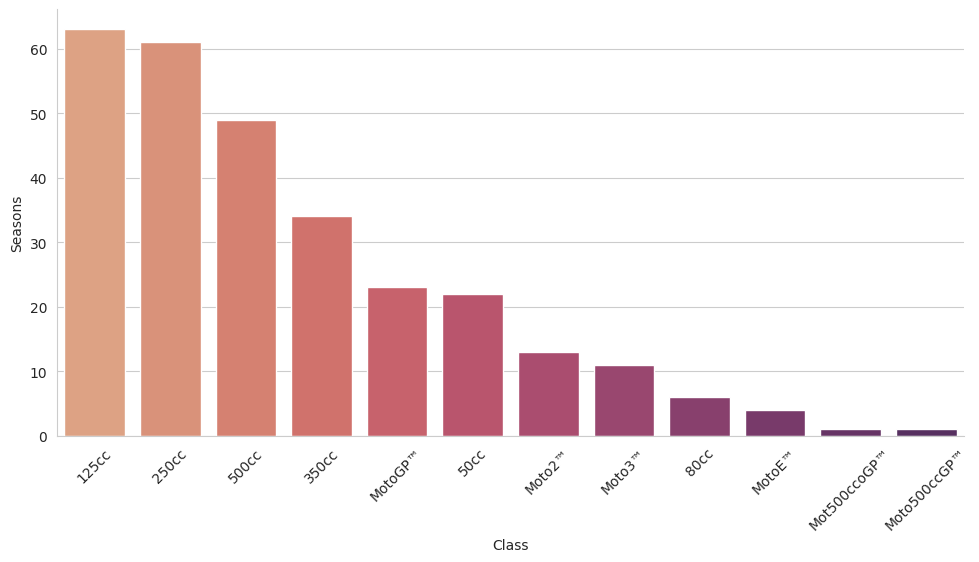

In [ ]:
paleta = sns.color_palette("flare", 12)
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
h = sns.catplot(data = categories, x = 'Class', y = 'Seasons', kind = 'bar',
                palette = paleta, aspect = 2)
h.set_xticklabels(rotation = 45)
plt.show

In [ ]:
df = winners.groupby(['Class', 'Constructor',]).count()
df

Season
Class   Constructor        
125cc   Aprilia           9
        Derbi             5
        Garelli           6
        Gilera            1
        Honda            14
...                     ...
MotoE™  Energica          4
MotoGP™ Ducati            2
        Honda            11
        Suzuki            2
        Yamaha            8

[70 rows x 1 columns]

#Descobrindo todos os vencedores e sua ocorrência

In [ ]:
total_wins= winners.groupby('Constructor').count()
total_wins.drop('Class', axis = 1, inplace= True)
total_wins.sort_values(by = 'Season', ascending=False, inplace = True)
total_wins.reset_index(inplace = True)
total_wins.rename(columns = {'Season': 'Victories'}, inplace = True)

In [ ]:
total_wins

,Constructor,Victories
0,Honda,65
1,Yamaha,38
2,MV Agusta,35
3,Aprilia,18
4,Suzuki,16
5,Derbi,11
6,Kalex,11
7,Kawasaki,9
8,Gilera,8
9,Moto Guzzi,8


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x600 with 0 Axes>

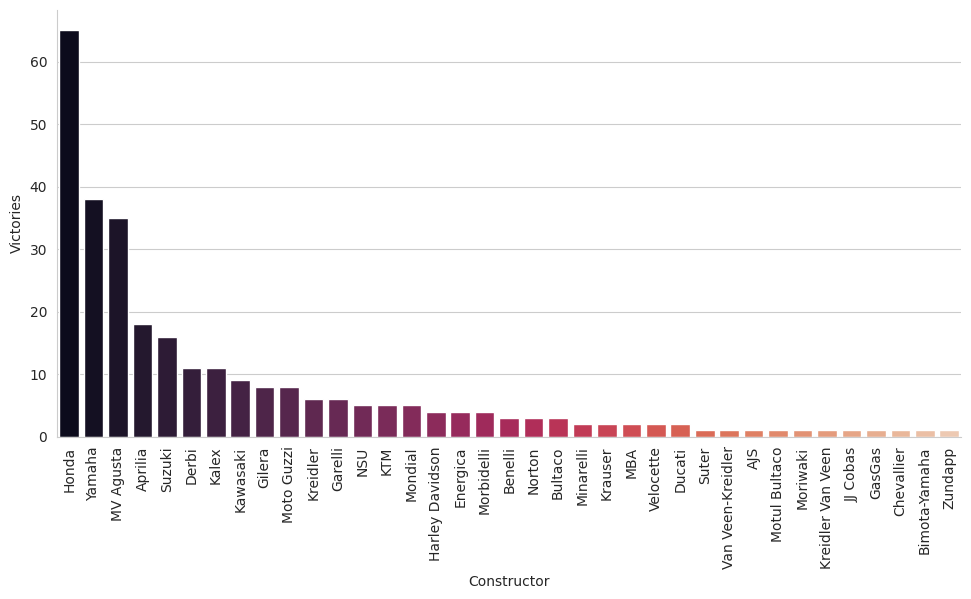

In [ ]:
paleta = sns.color_palette('rocket', 40)
sns.set_style("whitegrid")
plt.figure(figsize = (20,6))
h = sns.catplot(data = total_wins, x = 'Constructor', y = 'Victories', kind = 'bar',
                palette = paleta, aspect = 2)
h.set_xticklabels(rotation = 90)
plt.show

In [ ]:
total_wins.describe()

,Victories
count,37.000000
mean,7.783784
std,12.841199
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,65.000000


In [ ]:
fig = px.box(total_wins, x = 'Victories')
fig.show()

#outsiders Honda Yamaha MV Agusta
#agora, vamos agrupar esses 3 vencedores através das categorias

In [ ]:
outsiders = ['Honda', 'Yamaha', 'MV Agusta']
winners_outsiders = winners.query('Constructor in @outsiders').groupby(['Season', 'Constructor']).count().reset_index()
winners_outsiders

,Season,Constructor,Class
0,1952,MV Agusta,1
1,1955,MV Agusta,1
2,1956,MV Agusta,3
3,1958,MV Agusta,4
4,1959,MV Agusta,4
...,...,...,...
84,2016,Honda,1
85,2017,Honda,2
86,2018,Honda,2
87,2019,Honda,2


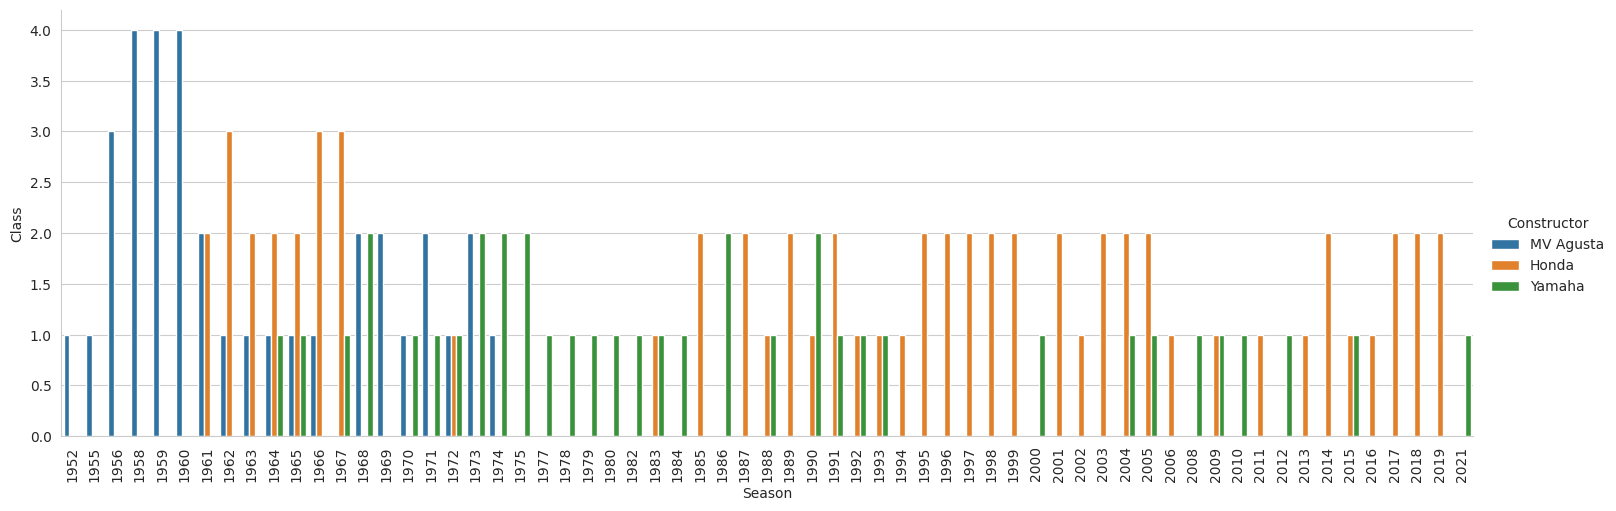

In [ ]:
h = sns.catplot(data = winners_outsiders, x = 'Season', y = 'Class', hue = 'Constructor', kind = 'bar',aspect = 3)
h.set_xticklabels(rotation = 90)

In [ ]:
winners.query("Constructor == 'Honda'").groupby('Class')['Constructor'].count()

Class
125cc      14
250cc      16
350cc       6
500cc      12
50cc        1
Moto3™      5
MotoGP™    11
Name: Constructor, dtype: int64

In [ ]:
winners.query("Constructor == 'Yamaha'").groupby('Class')['Constructor'].count()

Class
125cc       4
250cc      13
350cc       3
500cc      10
MotoGP™     8
Name: Constructor, dtype: int64

In [ ]:
winners.query("Constructor == 'MV Agusta'").groupby('Class')['Constructor'].count()

Class
125cc            6
250cc            4
350cc            9
500cc           14
Mot500ccoGP™     1
Moto500ccGP™     1
Name: Constructor, dtype: int64

In [ ]:
df = winners.query('Constructor in @outsiders').groupby(['Constructor', 'Class']).count()
df.reset_index(inplace = True)
df.rename(columns = {'Season': 'Victories'}, inplace = True)
df

,Constructor,Class,Victories
0,Honda,125cc,14
1,Honda,250cc,16
2,Honda,350cc,6
3,Honda,500cc,12
4,Honda,50cc,1
5,Honda,Moto3™,5
6,Honda,MotoGP™,11
7,MV Agusta,125cc,6
8,MV Agusta,250cc,4
9,MV Agusta,350cc,9


In [ ]:
fig = px.scatter(df, x = 'Class', y = 'Constructor', size = 'Victories', color = 'Victories')
fig.show()

In [ ]:
fig = px.density_heatmap(df, x = 'Class', z = 'Victories', y = 'Constructor')
fig.show()

In [ ]:
Honda = winners_outsiders.query('Constructor == "Honda"')
Honda.reset_index(inplace = True)
Honda.drop(['index', 'Constructor'], axis = 1, inplace = True)
Honda.rename(columns = {'Class': 'Victories'}, inplace = True)

<ipython-input-25-c211752e1c3e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-c211752e1c3e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Honda.head()

,Season,Victories
0,1961,2
1,1962,3
2,1963,2
3,1964,2
4,1965,2


In [ ]:
Y = Honda.Victories
X = sm.add_constant(Honda.Season)
regression_result = sm.OLS(Y, X, missing = 'drop').fit()

In [ ]:
print(f'A quantidade de títulos conquistados pela Honda em 2023 será de : {regression_result.predict([1, 2023])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Honda em 2024 será de : {regression_result.predict([1, 2024])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Honda em 2025 será de : {regression_result.predict([1, 2025])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Honda em 2026 será de : {regression_result.predict([1, 2026])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Honda em 2027 será de : {regression_result.predict([1, 2027])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Honda em 2028 será de : {regression_result.predict([1, 2028])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Honda em 2029 será de : {regression_result.predict([1, 2029])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Honda em 2030 será de : {regression_result.predict([1, 2030])[0]:.2f}')

A quantidade de títulos conquistados pela Honda em 2023 será de : 1.30
A quantidade de títulos conquistados pela Honda em 2024 será de : 1.29
A quantidade de títulos conquistados pela Honda em 2025 será de : 1.27
A quantidade de títulos conquistados pela Honda em 2026 será de : 1.26
A quantidade de títulos conquistados pela Honda em 2027 será de : 1.25
A quantidade de títulos conquistados pela Honda em 2028 será de : 1.23
A quantidade de títulos conquistados pela Honda em 2029 será de : 1.22
A quantidade de títulos conquistados pela Honda em 2030 será de : 1.21


In [ ]:
R2 = regression_result.rsquared
R2

0.16129573912260264

#YAMAHA

In [ ]:
Yamaha = winners_outsiders.query('Constructor == "Yamaha"')
Yamaha.reset_index(inplace = True)
Yamaha.drop(['index', 'Constructor'], axis = 1, inplace = True)
Yamaha.rename(columns = {'Class': 'Victories'}, inplace = True)

<ipython-input-30-d9c2498edf92>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-d9c2498edf92>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Y = Yamaha.Victories
X = sm.add_constant(Yamaha.Season)
regression_result = sm.OLS(Y, X, missing = 'drop').fit()

In [ ]:
print(f'A quantidade de títulos conquistados pela Yamaha em 2023 será de : {regression_result.predict([1, 2023])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Yamaha em 2024 será de : {regression_result.predict([1, 2024])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Yamaha em 2025 será de : {regression_result.predict([1, 2025])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Yamaha em 2026 será de : {regression_result.predict([1, 2026])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Yamaha em 2027 será de : {regression_result.predict([1, 2027])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Yamaha em 2028 será de : {regression_result.predict([1, 2028])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Yamaha em 2029 será de : {regression_result.predict([1, 2029])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela Yamaha em 2030 será de : {regression_result.predict([1, 2030])[0]:.2f}')

A quantidade de títulos conquistados pela Yamaha em 2023 será de : 0.94
A quantidade de títulos conquistados pela Yamaha em 2024 será de : 0.94
A quantidade de títulos conquistados pela Yamaha em 2025 será de : 0.93
A quantidade de títulos conquistados pela Yamaha em 2026 será de : 0.92
A quantidade de títulos conquistados pela Yamaha em 2027 será de : 0.92
A quantidade de títulos conquistados pela Yamaha em 2028 será de : 0.91
A quantidade de títulos conquistados pela Yamaha em 2029 será de : 0.90
A quantidade de títulos conquistados pela Yamaha em 2030 será de : 0.90


In [ ]:
R2 = regression_result.rsquared
R2

0.07867923207280847

#MV Agusta

In [ ]:
MV_Agusta = winners_outsiders.query('Constructor == "MV Agusta"')
MV_Agusta.reset_index(inplace = True)
MV_Agusta.drop(['index', 'Constructor'], axis = 1, inplace = True)
MV_Agusta.rename(columns = {'Class': 'Victories'}, inplace = True)

<ipython-input-34-16a4e2b0624c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-16a4e2b0624c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Y = MV_Agusta.Victories
X = sm.add_constant(MV_Agusta.Season)
regression_result = sm.OLS(Y, X, missing = 'drop').fit()

In [ ]:
print(f'A quantidade de títulos conquistados pela MV Agusta em 2023 será de : {regression_result.predict([1, 2023])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela MV Agusta em 2024 será de : {regression_result.predict([1, 2024])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela MV Agusta em 2025 será de : {regression_result.predict([1, 2025])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela MV Agusta em 2026 será de : {regression_result.predict([1, 2026])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela MV Agusta em 2027 será de : {regression_result.predict([1, 2027])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela MV Agusta em 2028 será de : {regression_result.predict([1, 2028])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela MV Agusta em 2029 será de : {regression_result.predict([1, 2029])[0]:.2f}')
print(f'A quantidade de títulos conquistados pela MV Agusta em 2030 será de : {regression_result.predict([1, 2030])[0]:.2f}')

A quantidade de títulos conquistados pela MV Agusta em 2023 será de : -1.33
A quantidade de títulos conquistados pela MV Agusta em 2024 será de : -1.38
A quantidade de títulos conquistados pela MV Agusta em 2025 será de : -1.44
A quantidade de títulos conquistados pela MV Agusta em 2026 será de : -1.49
A quantidade de títulos conquistados pela MV Agusta em 2027 será de : -1.54
A quantidade de títulos conquistados pela MV Agusta em 2028 será de : -1.60
A quantidade de títulos conquistados pela MV Agusta em 2029 será de : -1.65
A quantidade de títulos conquistados pela MV Agusta em 2030 será de : -1.71


In [ ]:
R2 = regression_result.rsquared
R2

0.09722115559836497